In [2]:
import random

def simulation(n):
    strings = [(i, i + 1) for i in range(1, 2 * n, 2)]
    ends = list(range(1, 2 * n + 1))
    loops = []

    while len(ends) > 0:  
        chosen_ends = random.sample(ends, 2)
        print(f"Strings: {strings}")
        print(f"Ends: {ends}")
        print(f"Loops: {loops}")
        print(f"Move: {chosen_ends}")
        
        chosen_strings = [string for string in strings if chosen_ends[0] in string or chosen_ends[1] in string]
        
        if len(chosen_strings) == 1: 
            loop = chosen_strings[0]
            loops.append(loop)
            strings.remove(loop)
            print(f"Tied {loop} to itself, forming a loop.")
        else:  
            strings.remove(chosen_strings[0])
            strings.remove(chosen_strings[1])
            new_string = tuple(sorted(chosen_strings[0] + chosen_strings[1]))
            strings.append(new_string)
            print(f"Combined {chosen_strings[0]} and {chosen_strings[1]} into {new_string}.")

        ends.remove(chosen_ends[0])
        ends.remove(chosen_ends[1])

    print(f"Final Loops: {loops}")
    print(f"Total number of loops formed: {len(loops)}")
    return strings, loops, len(loops)

In [3]:
simulation(3)

Strings: [(1, 2), (3, 4), (5, 6)]
Ends: [1, 2, 3, 4, 5, 6]
Loops: []
Move: [5, 2]
Combined (1, 2) and (5, 6) into (1, 2, 5, 6).
Strings: [(3, 4), (1, 2, 5, 6)]
Ends: [1, 3, 4, 6]
Loops: []
Move: [1, 6]
Tied (1, 2, 5, 6) to itself, forming a loop.
Strings: [(3, 4)]
Ends: [3, 4]
Loops: [(1, 2, 5, 6)]
Move: [3, 4]
Tied (3, 4) to itself, forming a loop.
Final Loops: [(1, 2, 5, 6), (3, 4)]
Total number of loops formed: 2


([], [(1, 2, 5, 6), (3, 4)], 2)

In [4]:
def newsimulation(n):
    strings = [(i, i + 1) for i in range(1, 2 * n, 2)]
    ends = list(range(1, 2 * n + 1))
    loops = []

    while len(ends) > 0:  
        chosen_ends = random.sample(ends, 2)

        chosen_strings = [string for string in strings if chosen_ends[0] in string or chosen_ends[1] in string]
        
        if len(chosen_strings) == 1:  
            loop = chosen_strings[0]
            loops.append(loop)
            strings.remove(loop)
        else:  
            strings.remove(chosen_strings[0])
            strings.remove(chosen_strings[1])
            new_string = tuple(sorted(chosen_strings[0] + chosen_strings[1]))
            strings.append(new_string)

        ends.remove(chosen_ends[0])
        ends.remove(chosen_ends[1])

    return len(loops)

In [5]:
def numberofsimulations(n, simulations):
    
    results = [newsimulation(n) for _ in range(simulations)]
    return results

In [6]:
numberofsimulations(4,10)

[3, 2, 1, 1, 2, 3, 2, 1, 1, 1]

In [7]:
import matplotlib.pyplot as plt

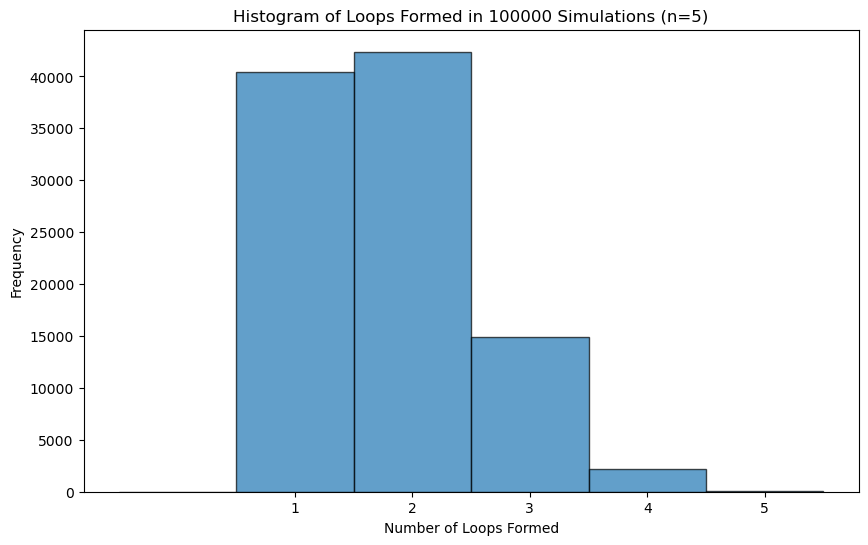

({1: 0.40393, 2: 0.42385, 3: 0.14936, 4: 0.02174, 5: 0.00112}, 1.79227)

In [8]:
a=5
b=100000
results = numberofsimulations(a, b)

plt.figure(figsize=(10, 6))
bin_edges = [x - 0.5 for x in range(min(results) - 1, max(results) + 2)]
plt.hist(results, bins=bin_edges, alpha=0.7, edgecolor='black')
plt.title('Histogram of Loops Formed in 100000 Simulations (n=5)')
plt.xlabel('Number of Loops Formed')
plt.ylabel('Frequency')
plt.xticks(range(min(results), max(results) + 1))
plt.show()

frequency = {x: results.count(x) / len(results) for x in set(results)} 

mean_value = sum(results) / len(results)

frequency, mean_value